In [1]:
import pandas as pd
import Bio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import umap

In [2]:
data = pd.read_excel('55k_oligos_sequence_and_expression_measurements.tab.xlsx', engine='openpyxl')
res = pd.read_csv('IRESLM_55k_oligos_sequence_and_expression_measurements.csv')
res = res.reset_index()
res = pd.merge(data, res, left_on = 'Sequence', right_on = 'sequence')
res.set_index('index')
res = res.replace([np.inf, -np.inf], np.nan)
res_mfe = res.dropna(subset=['mfe'])
res

,Index,Oligo_name,Sequence,mfe,ires_activity,promoter_activity,splicing_score,index,sequence,length,...,Pred_R0,Pred_R1,Pred_R2,Pred_R3,Pred_R4,Pred_R5,Pred_R6,Pred_R7,Pred_R8,Pred_R9
0,1,no_barcode;Human_5UTR_Screen;FOXD1;NM_004472;1...,CTAGGGCGCGCCAGTCCTCGCCGCCACCCGGCAGCCCCGGCGCAGC...,-116.40,NaN,NaN,NaN,0,CTAGGGCGCGCCAGTCCTCGCCGCCACCCGGCAGCCCCGGCGCAGC...,212,...,1,1,1,1,1,1,1,1,1,1
1,2,no_barcode;Human_5UTR_Screen;FAM127A;NM_001078...,CTAGGGCGCGCCAGTCCTCGCATTTCCGGCGACGCCTCGGTACTGA...,-93.60,206.29,0.0,NaN,1,CTAGGGCGCGCCAGTCCTCGCATTTCCGGCGACGCCTCGGTACTGA...,212,...,1,1,1,1,1,1,1,1,1,1
2,3,no_barcode;Human_5UTR_Screen;SF3B5;NM_031287;1...,CTAGGGCGCGCCAGTCCTTCTTCTGCGACGGCGCGGACCTGGAGCT...,-79.50,206.29,0.0,NaN,2,CTAGGGCGCGCCAGTCCTTCTTCTGCGACGGCGCGGACCTGGAGCT...,212,...,1,1,1,1,1,1,1,1,1,1
3,4,no_barcode;Human_5UTR_Screen;TSPYL4;NM_021648;...,CTAGGGCGCGCCAGTCCTGGAGGGGTGGTGCTAGACGTTTCGGGCA...,-85.70,206.29,0.0,NaN,3,CTAGGGCGCGCCAGTCCTGGAGGGGTGGTGCTAGACGTTTCGGGCA...,212,...,1,1,1,1,1,1,1,1,1,1
4,5,no_barcode;Human_5UTR_Screen;FAM127B;NM_001078...,CTAGGGCGCGCCAGTCCTCACCCTCGACATGCGCTTCCGGCGACGC...,-92.40,NaN,NaN,NaN,4,CTAGGGCGCGCCAGTCCTCACCCTCGACATGCGCTTCCGGCGACGC...,212,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,54996,10nt_barcode;Synthetic_IRES_backgrounds_multip...,CTAGGGCGCGCCAGTCCTTCTCAAACAATTACTTCACCGGCGGGTC...,-102.60,831.16,NaN,-4.7537,54995,CTAGGGCGCGCCAGTCCTTCTCAAACAATTACTTCACCGGCGGGTC...,212,...,1,1,1,1,1,1,1,1,1,1
54996,54997,10nt_barcode;Synthetic_IRES_backgrounds_multip...,CTAGGGCGCGCCAGTCCTAAACAAGGCCTTACTTCACGTCAATTCC...,-29.34,502.64,0.0,NaN,54996,CTAGGGCGCGCCAGTCCTAAACAAGGCCTTACTTCACGTCAATTCC...,212,...,1,1,1,1,1,1,1,1,1,1
54997,54998,10nt_barcode;Synthetic_IRES_backgrounds_multip...,CTAGGGCGCGCCAGTCCTCGAAACAACTTTACTTCATACTCCCTCC...,-41.09,206.29,0.0,NaN,54997,CTAGGGCGCGCCAGTCCTCGAAACAACTTTACTTCATACTCCCTCC...,212,...,1,1,1,1,1,1,1,1,1,1
54998,54999,10nt_barcode;Synthetic_IRES_backgrounds_multip...,CTAGGGCGCGCCAGTCCTACGAAACAAGTTACTTCATTCTTGGCAA...,-47.50,206.29,0.0,NaN,54998,CTAGGGCGCGCCAGTCCTACGAAACAAGTTACTTCATTCTTGGCAA...,212,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Downloaded npy from https://drive.google.com/file/d/1LucxhRcG6v7mousuFvKKIqPD4KP_rsrC/view?usp=drive_link
repr_f0 = np.load('IRES_RNAFM_fold0_repr_55k_oligos_sequence_and_expression_measurements.npy')
repr_f0.shape

(55000, 640)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def plot_umap_with_metric(representations, values, metric_transform='none', use_pca=False, n_components=50):
    """
    Plots UMAP projection of the given representations colored by the given metric values.

    Parameters:
    representations (numpy.ndarray): The high-dimensional data to be reduced.
    values (numpy.ndarray): The metric values to color the UMAP projection.
    metric_transform (str): Transformation to apply to the metric values ('none', 'standardize', 'normalize').
    use_pca (bool): Whether to use PCA for dimensionality reduction before UMAP.
    n_components (int): Number of components for PCA if use_pca is True.

    Returns:
    None
    """
    
    # Transform the metric values if specified
    if metric_transform == 'standardize':
        scaler = StandardScaler()
        values = scaler.fit_transform(values.reshape(-1, 1)).flatten()
    elif metric_transform == 'normalize':
        min_max_scaler = MinMaxScaler()
        values = min_max_scaler.fit_transform(values.reshape(-1, 1)).flatten()
    elif metric_transform == 'log':
        values = np.log10(values - values.min() + 1)  # Shift values to positive before log
        
    # Perform PCA if specified
    if use_pca:
        pca = PCA(n_components=n_components)
        representations = pca.fit_transform(representations)

    # Initialize UMAP
    reducer = umap.UMAP()

    # Fit and transform the data
    embedding = reducer.fit_transform(representations)

    # Create a DataFrame for visualization
    df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
    df['Metric'] = values

    # Plotting
    plt.figure(figsize=(6, 6))
       # Check if values are discrete
    if len(np.unique(values)) < 10:  # Arbitrary threshold for considering values as discrete
        scatter = plt.scatter(df['UMAP1'], df['UMAP2'], c=df['Metric'], cmap='Pastel1_r', s=1)
        plt.colorbar(scatter, label='MFE')
    else:
        scatter = plt.scatter(df['UMAP1'], df['UMAP2'], c=df['Metric'], cmap='gnuplot2', s=1)
        plt.colorbar(scatter, label='MFE')

    plt.title('(e) Representation of IRES-RNAFM with MFE Coloring')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.savefig('Fig2d.pdf')
    plt.show()

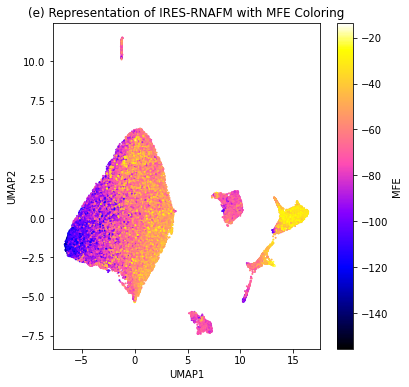

In [8]:
representations = repr_f0[res_mfe.index]
values = res_mfe.mfe.values
plot_umap_with_metric(representations, values, metric_transform='none', use_pca=True, n_components=10)